# Rede Neurais Multicamadas


Uma rede neural multicamadas é uma rede neural artificial com uma camada de entrada, uma camada de saída e pelo menos uma camada oculta. 
Normalmente, por meio de camadas ocultas, é possível modelar dados não lineares.


Vamos utilizar a base de dados [wine](https://www.kaggle.com/brynja/wineuci), que é o resultado de uma análise química de vinhos cultivados na mesma região na Itália. A análise determinou três classes:
- Classe 1 - 59
- Classe 2 - 71
- Classe 3 - 48

e 13 variáveis:

1. Alcohol
2. Malic acid
3. Ash
4. Alcalinity of ash
5. Magnesium
6. Total phenols
7. Flavanoids
8. Nonflavanoid phenols
9. Proanthocyanins
10. Color intensity
11. Hue
12. OD280/OD315 of diluted wines
13. Proline

**Carregar a base de dados:**

In [1]:
from sklearn import datasets
wine = datasets.load_wine()

**Função de Análise**

In [2]:
def analysis(modelo, X, Y, predicao):
  titles_options = [("Matriz de confusão, sem normalizar", None),
                  ("Matriz de confusão normalizada", 'true')]
  for title, normalize in titles_options:
      disp = plot_confusion_matrix(modelo, X, Y,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
      disp.ax_.set_title(title)
 
      print(title)
      print(disp.confusion_matrix)
 
  plt.show()
  print(classification_report(Y, predicao))

**Imports necessários para a execução do código:**

In [3]:
from sklearn import svm, tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report,silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas

## **Todas variáveis relacionadas a saída**


**Segregação dos dados:**

In [4]:
X_training, X_testing, y_training, y_testing = train_test_split(
   wine.data[:,:12], wine.target, test_size=0.4
)

### **MLP**

**Instância do modelo e seu treinamento:**

In [58]:
nn = MLPClassifier(alpha=0.01,max_iter=2000, hidden_layer_sizes=20,activation='relu')
nn.fit(X_training, y_training)
 
yp=nn.predict(X_testing)

**Análise dos resultados:**

Matriz de confusão, sem normalizar
[[20  0  1]
 [14 12  7]
 [ 3  2 13]]
Matriz de confusão normalizada
[[0.95238095 0.         0.04761905]
 [0.42424242 0.36363636 0.21212121]
 [0.16666667 0.11111111 0.72222222]]


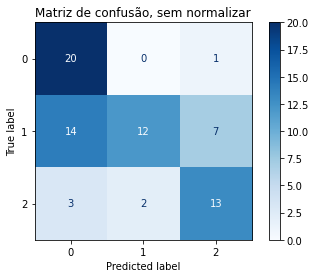

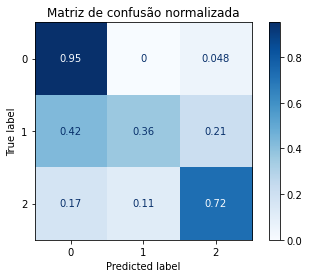

              precision    recall  f1-score   support

           0       0.54      0.95      0.69        21
           1       0.86      0.36      0.51        33
           2       0.62      0.72      0.67        18

    accuracy                           0.62        72
   macro avg       0.67      0.68      0.62        72
weighted avg       0.71      0.62      0.60        72



In [59]:
analysis(nn, X_testing, y_testing, yp)

### **SVM**

**Instância do modelo e seu treinamento:**

In [7]:
parameters = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.001, 0.01, 0.1, 1, 2, 5, 10, 20, 50, 100],
    'gamma': [0.01, 0.1, 0.5, 1]
}
 
csvm = svm.SVC()
svm_ = GridSearchCV(csvm, param_grid=parameters, cv=3)
svm_.fit(X_training, y_training)
ypSVM = svm_.predict(X_testing)

**Análise dos resultados:**

Matriz de confusão, sem normalizar
[[21  0  0]
 [ 1 31  1]
 [ 0  1 17]]
Matriz de confusão normalizada
[[1.         0.         0.        ]
 [0.03030303 0.93939394 0.03030303]
 [0.         0.05555556 0.94444444]]


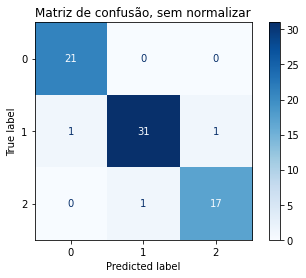

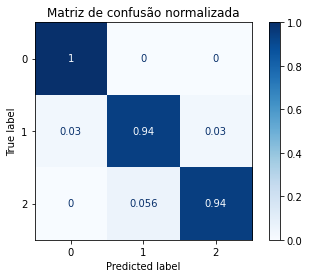

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       0.97      0.94      0.95        33
           2       0.94      0.94      0.94        18

    accuracy                           0.96        72
   macro avg       0.96      0.96      0.96        72
weighted avg       0.96      0.96      0.96        72



In [8]:
analysis(svm_, X_testing, y_testing, ypSVM)

### **Naive-Bayes**

**Instância do modelo e seu treinamento:**

In [9]:
nb = GaussianNB()
nb.fit(X_training, y_training)
nb_predict = nb.predict(X_testing)

**Análise dos resultados:**

Matriz de confusão, sem normalizar
[[21  0  0]
 [ 0 33  0]
 [ 0  0 18]]
Matriz de confusão normalizada
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


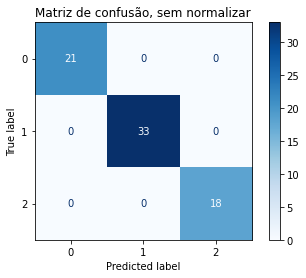

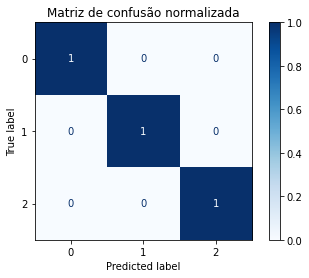

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        33
           2       1.00      1.00      1.00        18

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72



In [10]:
analysis(nb, X_testing, y_testing, nb_predict)

### **Decision tree**

**Instância do modelo e seu treinamento:**

In [11]:
dt = tree.DecisionTreeClassifier()
dt.fit(X_training, y_training)
dt_predict = dt.predict(X_testing)

**Análise dos resultados:**

Matriz de confusão, sem normalizar
[[21  0  0]
 [ 1 31  1]
 [ 1  3 14]]
Matriz de confusão normalizada
[[1.         0.         0.        ]
 [0.03030303 0.93939394 0.03030303]
 [0.05555556 0.16666667 0.77777778]]


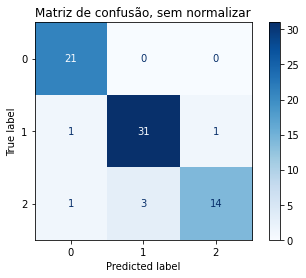

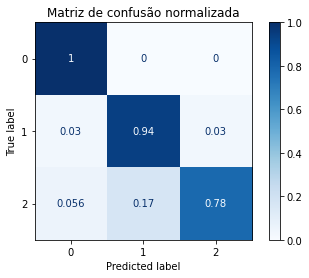

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        21
           1       0.91      0.94      0.93        33
           2       0.93      0.78      0.85        18

    accuracy                           0.92        72
   macro avg       0.92      0.91      0.91        72
weighted avg       0.92      0.92      0.91        72



In [12]:
analysis(dt, X_testing, y_testing, dt_predict)

### **Logistic Regression**

**Instância do modelo e seu treinamento:**

In [13]:
lgr = LogisticRegression(random_state=0, max_iter=2000)
lgr.fit(X_training, y_training)
lgr_predict = lgr.predict(X_testing)

**Análise dos resultados:**

Matriz de confusão, sem normalizar
[[21  0  0]
 [ 2 30  1]
 [ 0  1 17]]
Matriz de confusão normalizada
[[1.         0.         0.        ]
 [0.06060606 0.90909091 0.03030303]
 [0.         0.05555556 0.94444444]]


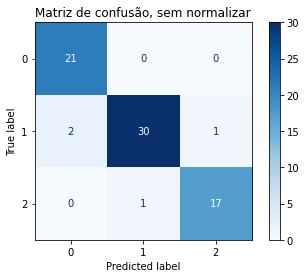

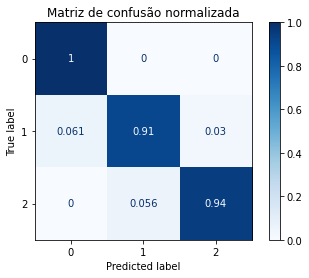

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        21
           1       0.97      0.91      0.94        33
           2       0.94      0.94      0.94        18

    accuracy                           0.94        72
   macro avg       0.94      0.95      0.95        72
weighted avg       0.95      0.94      0.94        72



In [14]:
analysis(lgr, X_testing, y_testing, lgr_predict)

### **KNN**

**Instância do modelo e seu treinamento:**

In [15]:
knn_ = KNeighborsClassifier(n_neighbors=3)
knn_.fit(X_training, y_training)
 
knn_predict = knn_.predict(X_testing)

**Análise dos resultados:**

Matriz de confusão, sem normalizar
[[21  0  0]
 [ 7 26  0]
 [ 2  2 14]]
Matriz de confusão normalizada
[[1.         0.         0.        ]
 [0.21212121 0.78787879 0.        ]
 [0.11111111 0.11111111 0.77777778]]


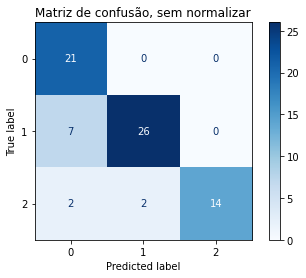

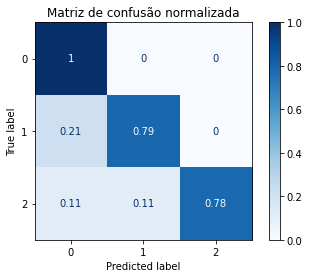

              precision    recall  f1-score   support

           0       0.70      1.00      0.82        21
           1       0.93      0.79      0.85        33
           2       1.00      0.78      0.88        18

    accuracy                           0.85        72
   macro avg       0.88      0.86      0.85        72
weighted avg       0.88      0.85      0.85        72



In [16]:
analysis(knn_, X_testing, y_testing, knn_predict)

## Dados bi-dimensionais

### **_Heat Map_**

<AxesSubplot:>

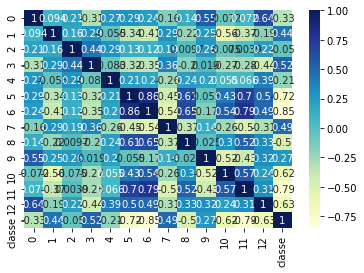

In [17]:
tabela = pandas.DataFrame(wine.data)
tabela['classe'] = wine.target
correlacoes = tabela.corr()
sns.heatmap(correlacoes, cmap="YlGnBu", annot = True)

### **Duas variáveis mais correlacionadas com a saída**

In [18]:
wine_n = np.array(wine.data[:,[6,11]])
Xn_training, Xn_testing, yn_training, yn_testing = train_test_split(
   wine_n, wine.target, test_size=0.4
)

#### **MLP**

**Instância do modelo e seu treinamento:**

In [19]:
nn_2 = MLPClassifier(alpha=0.01,max_iter=2000, hidden_layer_sizes=20,activation='relu')
nn_2.fit(Xn_training, yn_training)
 
yp2=nn_2.predict(Xn_testing)

**Análise dos resultados:**

Matriz de confusão, sem normalizar
[[21  3  0]
 [10 19  1]
 [ 0  0 18]]
Matriz de confusão normalizada
[[0.875      0.125      0.        ]
 [0.33333333 0.63333333 0.03333333]
 [0.         0.         1.        ]]


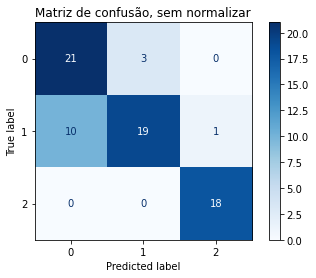

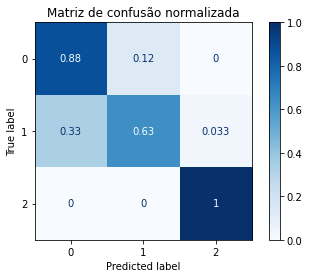

              precision    recall  f1-score   support

           0       0.68      0.88      0.76        24
           1       0.86      0.63      0.73        30
           2       0.95      1.00      0.97        18

    accuracy                           0.81        72
   macro avg       0.83      0.84      0.82        72
weighted avg       0.82      0.81      0.80        72



In [20]:
analysis(nn_2, Xn_testing, yn_testing, yp2)

#### **SVM**

**Instância do modelo e seu treinamento:**

In [21]:
csvm_2 = svm.SVC()
svm_2 = GridSearchCV(csvm_2, param_grid=parameters, cv=3)
svm_2.fit(Xn_training, yn_training)
ypSVM2 = svm_2.predict(Xn_testing)

**Análise dos resultados:**

Matriz de confusão, sem normalizar
[[23  1  0]
 [10 18  2]
 [ 0  0 18]]
Matriz de confusão normalizada
[[0.95833333 0.04166667 0.        ]
 [0.33333333 0.6        0.06666667]
 [0.         0.         1.        ]]


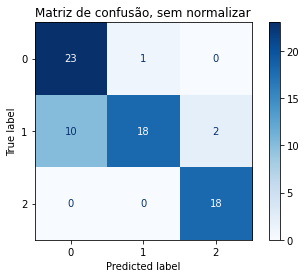

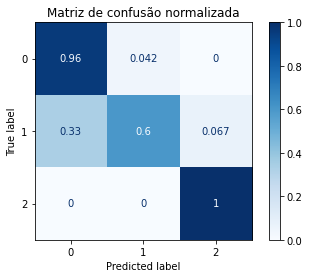

              precision    recall  f1-score   support

           0       0.70      0.96      0.81        24
           1       0.95      0.60      0.73        30
           2       0.90      1.00      0.95        18

    accuracy                           0.82        72
   macro avg       0.85      0.85      0.83        72
weighted avg       0.85      0.82      0.81        72



In [22]:
analysis(svm_2, Xn_testing, yn_testing, ypSVM2)

#### **Naive-Bayes**

**Instância do modelo e seu treinamento:**

In [23]:
nb_2 = GaussianNB()
nb_2.fit(Xn_training, yn_training)
nb_2_predict = nb_2.predict(Xn_testing)

**Análise dos resultados:**

Matriz de confusão, sem normalizar
[[22  2  0]
 [ 8 20  2]
 [ 0  0 18]]
Matriz de confusão normalizada
[[0.91666667 0.08333333 0.        ]
 [0.26666667 0.66666667 0.06666667]
 [0.         0.         1.        ]]


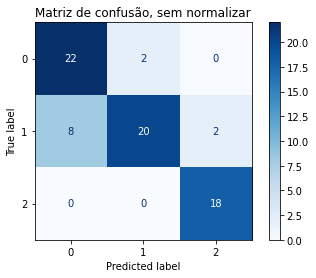

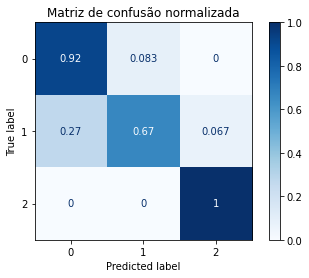

              precision    recall  f1-score   support

           0       0.73      0.92      0.81        24
           1       0.91      0.67      0.77        30
           2       0.90      1.00      0.95        18

    accuracy                           0.83        72
   macro avg       0.85      0.86      0.84        72
weighted avg       0.85      0.83      0.83        72



In [24]:
analysis(nb_2, Xn_testing, yn_testing, nb_2_predict)

#### **Decision tree**

**Instância do modelo e seu treinamento:**

In [25]:
dt_2 = tree.DecisionTreeClassifier()
dt_2.fit(Xn_training, yn_training)
dt_2_predict = dt_2.predict(Xn_testing)

**Análise dos resultados:**

Matriz de confusão, sem normalizar
[[18  6  0]
 [ 7 22  1]
 [ 0  3 15]]
Matriz de confusão normalizada
[[0.75       0.25       0.        ]
 [0.23333333 0.73333333 0.03333333]
 [0.         0.16666667 0.83333333]]


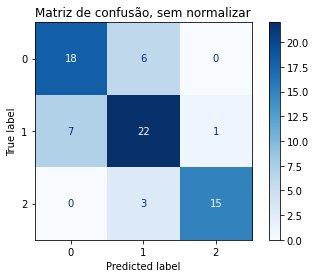

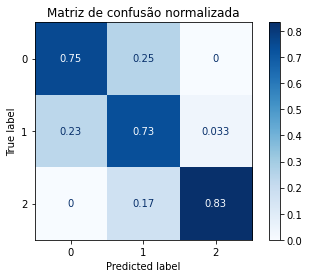

              precision    recall  f1-score   support

           0       0.72      0.75      0.73        24
           1       0.71      0.73      0.72        30
           2       0.94      0.83      0.88        18

    accuracy                           0.76        72
   macro avg       0.79      0.77      0.78        72
weighted avg       0.77      0.76      0.77        72



In [26]:
analysis(dt_2, Xn_testing, yn_testing, dt_2_predict)

#### **Logistic regression**

**Instância do modelo e seu treinamento:**

In [27]:
lgr_2 = LogisticRegression(random_state=0, max_iter=2000)
lgr_2.fit(Xn_training, yn_training)
lgr_2_predict = lgr_2.predict(Xn_testing)

**Análise dos resultados:**

Matriz de confusão, sem normalizar
[[22  2  0]
 [ 6 23  1]
 [ 0  0 18]]
Matriz de confusão normalizada
[[0.91666667 0.08333333 0.        ]
 [0.2        0.76666667 0.03333333]
 [0.         0.         1.        ]]


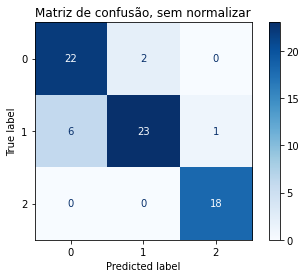

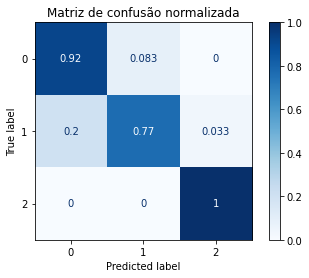

              precision    recall  f1-score   support

           0       0.79      0.92      0.85        24
           1       0.92      0.77      0.84        30
           2       0.95      1.00      0.97        18

    accuracy                           0.88        72
   macro avg       0.88      0.89      0.89        72
weighted avg       0.88      0.88      0.87        72



In [28]:
analysis(lgr_2, Xn_testing, yn_testing, lgr_2_predict)

#### **KNN**

**Instância do modelo e seu treinamento:**

In [29]:
knn_2 = KNeighborsClassifier(n_neighbors=2)
knn_2.fit(Xn_training, yn_training)
 
knn_2_predict = knn_2.predict(Xn_testing)

**Análise dos resultados:**

Matriz de confusão, sem normalizar
[[22  2  0]
 [11 18  1]
 [ 0  2 16]]
Matriz de confusão normalizada
[[0.91666667 0.08333333 0.        ]
 [0.36666667 0.6        0.03333333]
 [0.         0.11111111 0.88888889]]


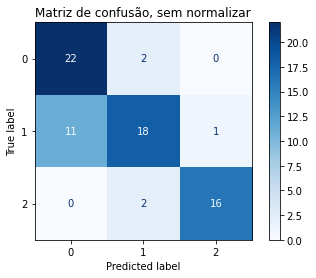

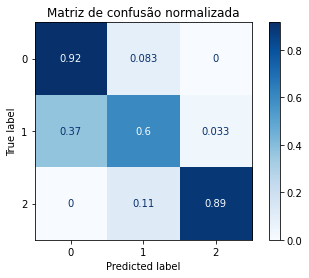

              precision    recall  f1-score   support

           0       0.67      0.92      0.77        24
           1       0.82      0.60      0.69        30
           2       0.94      0.89      0.91        18

    accuracy                           0.78        72
   macro avg       0.81      0.80      0.79        72
weighted avg       0.80      0.78      0.77        72



In [30]:
analysis(knn_2, Xn_testing, yn_testing, knn_2_predict)

## **K-means**


Referindo-se a métodos que necessitam clusterizar os seus dados, o k-means é o favorito. Contudo se tratando de dados com grandes dimensões, esse método não possui uma boa reputação. 
 
**Método k-means para clusterizar os dados wine:**

In [31]:
modelo_kmeans_12_dimensoes = KMeans(n_clusters=3)

 **Treinamento com todos os atributos:**

In [32]:
modelo_kmeans_12_dimensoes.fit(X_training)

KMeans(n_clusters=3)

**Predição:**

In [33]:
predicao_12_dimensoes = modelo_kmeans_12_dimensoes.predict(X_training)

É possível ver que com as 12 dimensões selecionadas o escore de silhueta do k-means é de `0.4613015495905301`

É possível reduzir a dimensão dos dados utilizando métodos como Análise de Componentes Principais (PCA) que, neste exemplo, teríamos a redução de 12 dimensões para 2 dimensões. Contudo, utilizarei o heat map para a redução da dimensão.

**Método k-means bi-dimensional:**

In [34]:
modelo_kmeans_2_dimensional = KMeans(n_clusters=3)

**Treinamento com dados bi-dimensionais:**

In [35]:
modelo_kmeans_2_dimensional.fit(Xn_training)

KMeans(n_clusters=3)

**Predição dos dados bi-dimensionais:**

In [36]:
predicao_bidimensional = modelo_kmeans_2_dimensional.predict(Xn_training)

### **Análise:**

Para realizar a análise será escolhido o escore da silhueta. Com esse escore é possível analisar a densidade dos clusters e quão longe um está do outro. Sendo 1 o melhor escore, -1 o pior e o 0 indicando clusters sobrepostos. Os escores negativos indicam clusterização incorreta.

Análise do método aplicado a 12 dimensões:

In [37]:
silhouette_score(X_training, predicao_12_dimensoes)

0.4336837905742414

Análise do método aplicado a 2 dimensões:

In [38]:
silhouette_score(Xn_training, predicao_bidimensional)

0.4839389760432355

Concluí-se então que com a redução das dimensões, de 12 para 2, o k-means apresentou um melhor escore. Ou seja, com duas dimensões os clusters ficam mais bem definidos (distância de densidade) do que com doze dimensões.

**Aprensentaçõa visual dos clusters:**

Cluster nas 12 dimensões:


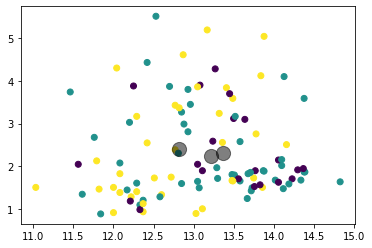

In [39]:
plt.scatter(X_training[:,0],X_training[:,1], c=predicao_12_dimensoes, cmap='viridis')
centroids_12_dimensoes = modelo_kmeans_12_dimensoes.cluster_centers_
plt.scatter(centroids_12_dimensoes[:, 0], centroids_12_dimensoes[:, 1], c='black', s=200, alpha=0.5)
plt.show()

Cluster nas 2 dimensões:

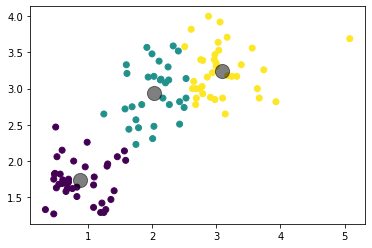

In [40]:
plt.scatter(Xn_training[:,0],Xn_training[:,1], c=predicao_bidimensional, cmap='viridis')
centroids_2_dimensoes = modelo_kmeans_2_dimensional.cluster_centers_
plt.scatter(centroids_2_dimensoes[:, 0], centroids_2_dimensoes[:, 1], c='black', s=200, alpha=0.5)
plt.show()

## **Regressão Linear**

In [41]:
rl_data = np.array(wine.data[:,[5,6]])
X_rl_training, X_rl_testing, y_rl_training, y_rl_testing = train_test_split(
   rl_data, wine.target, test_size=0.4
)

rl_data_2 = np.array(wine.data[:,[5,4]])
X_rl_training_2, X_rl_testing_2, y_rl_training_2, y_rl_testing_2 = train_test_split(
   rl_data_2, wine.target, test_size=0.4
)

**Modelo aplicado nas colunas 5 e 6:**

In [42]:
rL_12 = LinearRegression()

**Treinamento do Modelo nas colunas 5 e 6:**

In [43]:
rL_12.fit(X_rl_training, y_rl_training)

LinearRegression()

**Predição do modelo referente as colunas 5 e 6:**

In [44]:
predicao_rL_12 = rL_12.predict(X_rl_testing)

**Modelo aplicado nas colunas 5 e 4:**

In [45]:
rL_2 = LinearRegression()

**Treinamento do Modelo nas colunas 5 e 4:**

In [46]:
rL_2.fit(X_rl_training_2, y_rl_training_2)

LinearRegression()

**Predição do modelo referente as colunas 5 e 4:**

In [47]:
predicao_rL_2 = rL_2.predict(X_rl_testing_2)

### **Análise**

Para a análise da regressão linear estarei utilizando do escore já disponibilizado pelo *sk_learn*, em que ele calcula o coeficiênte R² da regressão, sendo 1 o melhor escore possível.

**Escore referente as colunas 5 e 6:**

In [48]:
rL_12.score(X_rl_testing, y_rl_testing)

0.7430510998182088

**Escore referente as colunas 5 e 4:**

In [49]:
rL_2.score(X_rl_testing_2, y_rl_testing_2)

0.22663765753203025

## Fontes:
 
[Dataset Wine disponível no Kaggle](https://www.kaggle.com/brynja/wineuci)
 
[Dataset Wine UC Irvine](https://archive.ics.uci.edu/ml/machine-learning-databases/wine)
 
[Playground tensorflow](http://playground.tensorflow.org/)
 
[Testing classifiers for wine variety prediction](https://www.kaggle.com/brynja/testing-classifiers-for-wine-variety-prediction)
 
[Wine classification using Tensorflow with 100% acc](https://www.kaggle.com/kollidatta/wine-classification-using-tensorflow-with-100-acc)
 
[Aula sobre classificação](https://colab.research.google.com/drive/1aidq_Lpmp6b5IiDCxvgWmcakMmuQh7qa?usp=sharing)